## Analisis de Ritmo Circadiano.
El ritmo circadiano es una variable de confusión en la mayor parte de la fisiología y es importante tenerla en cuenta como característica, especialmente porque existe una conexión conocida entre el ritmo circadiano y la glucosa en sangre.
La frecuencia cardiaca y la acelerometría se han utilizado anteriormente para determinar los estados de vigilia frente a los de sueño.

In [159]:
import pandas as pd
import numpy as np

# Read the two CSV files
ACC = pd.read_csv('ACC_016.csv')
HR = pd.read_csv('HR_016.csv')

### Aplicamos el Resample

In [160]:
# Convertimos en fechas los datimetimes
ACC['datetime'] = pd.to_datetime(ACC['datetime'])
HR['datetime'] = pd.to_datetime(HR['datetime'])

In [161]:
print(ACC.columns)

## Añadimos el valor de la magnitud
ACC["magnitude"] = np.sqrt(ACC[' acc_x']**2 + ACC[' acc_y']**2 + ACC[' acc_z']**2)

ACC.head()

Index(['datetime', ' acc_x', ' acc_y', ' acc_z'], dtype='object')


,datetime,acc_x,acc_y,acc_z,magnitude
0,2020-07-16 09:29:03.000000,-39.0,-28.0,37.0,60.613530
1,2020-07-16 09:29:03.031250,-38.0,-27.0,37.0,59.514704
2,2020-07-16 09:29:03.062500,-37.0,-37.0,37.0,64.085880
3,2020-07-16 09:29:03.093750,-47.0,-27.0,41.0,67.963225
4,2020-07-16 09:29:03.125000,-39.0,-37.0,34.0,63.608176


In [162]:
# Resamplear y calcular la media y desviación estándar por minuto y hora para Heart Rate
hr_resampled_min = HR.resample('T', on='datetime').agg({' hr': ['mean', 'std']})
hr_resampled_hour = HR.resample('H', on='datetime').agg({' hr': ['mean', 'std']})

# Resamplear y calcular la media y desviación estándar por minuto y hora para Acelerometría
acc_resampled_min = ACC.resample('T', on='datetime').agg({'magnitude': ['mean', 'std']})
acc_resampled_hour = ACC.resample('H', on='datetime').agg({'magnitude': ['mean', 'std']})

In [163]:
# Calcular la media diaria de Heart Rate y Acelerometría para cada día
daily_stats_hr = HR.set_index('datetime').resample('D').agg({' hr': ['mean', 'std']})
daily_stats_acc = ACC.set_index('datetime').resample('D').agg({'magnitude': ['mean', 'std']})

In [164]:
# Combinamos la acelerometria y el ritmo cardiaco por minuto y por horas en 2 diferentes datasets
combined_df_min = pd.merge(acc_resampled_min, hr_resampled_min, on='datetime')
combined_df_min.head()

magnitude                    hr          
                          mean        std       mean       std
datetime                                                      
2020-07-16 09:29:00  65.035743  11.721119  92.710426  5.689590
2020-07-16 09:30:00  62.771127   4.651160  82.493333  4.822034
2020-07-16 09:31:00  62.724830   3.867171  74.147167  1.723628
2020-07-16 09:32:00  62.892835   1.051655  85.611000  1.793354
2020-07-16 09:33:00  62.684792   3.410695  78.353833  1.559475

In [165]:
combined_df_hour = pd.merge(acc_resampled_hour, hr_resampled_hour, on='datetime')
combined_df_hour.head()

magnitude                   hr           
                          mean       std       mean        std
datetime                                                      
2020-07-16 09:00:00  62.836575  4.116197  77.057385   6.135436
2020-07-16 10:00:00  63.699399  7.898439  88.877458  12.509688
2020-07-16 11:00:00  63.038655  4.180281  85.929608   9.778335
2020-07-16 12:00:00  63.215403  5.198428  81.495628   6.695853
2020-07-16 13:00:00  63.371440  6.171390  84.967678   9.679853

### Vamos a crear la funcion para añadir el indicador

In [166]:
# Renombrar las columnas para mayor claridad
combined_df_min.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_df_min.columns.values]
combined_df_hour.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_df_hour.columns.values]

In [167]:
combined_df_min['indicator_ritmo_circadiano'] = 1
combined_df_hour['indicator_ritmo_circadiano'] = 1

In [168]:
combined_df_min.head(15)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano
datetime,,,,,
2020-07-16 09:29:00,65.035743,11.721119,92.710426,5.689590,1
2020-07-16 09:30:00,62.771127,4.651160,82.493333,4.822034,1
2020-07-16 09:31:00,62.724830,3.867171,74.147167,1.723628,1
2020-07-16 09:32:00,62.892835,1.051655,85.611000,1.793354,1
2020-07-16 09:33:00,62.684792,3.410695,78.353833,1.559475,1
2020-07-16 09:34:00,62.577908,5.006735,72.886500,5.455223,1
2020-07-16 09:35:00,62.108302,4.626871,68.814333,3.945241,1
2020-07-16 09:36:00,62.251373,1.551930,65.974333,3.711814,1
2020-07-16 09:37:00,62.744445,1.750817,70.744667,3.888292,1


In [169]:
combined_df_hour.head(15)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano
datetime,,,,,
2020-07-16 09:00:00,62.836575,4.116197,77.057385,6.135436,1
2020-07-16 10:00:00,63.699399,7.898439,88.877458,12.509688,1
2020-07-16 11:00:00,63.038655,4.180281,85.929608,9.778335,1
2020-07-16 12:00:00,63.215403,5.198428,81.495628,6.695853,1
2020-07-16 13:00:00,63.371440,6.171390,84.967678,9.679853,1
2020-07-16 14:00:00,63.009526,4.205482,84.185486,13.558949,1
2020-07-16 15:00:00,62.996885,5.131926,93.193364,14.189919,1
2020-07-16 16:00:00,63.028031,5.624842,97.614256,13.917173,1
2020-07-16 17:00:00,63.658786,6.270833,92.581403,10.287956,1


In [170]:
daily_stats_hr.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in daily_stats_hr.columns.values]
daily_stats_acc.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in daily_stats_acc.columns.values]


In [171]:
daily_stats_acc.head()

,magnitude_mean,magnitude_std
datetime,,
2020-07-16,63.268604,5.447604
2020-07-17,63.421892,4.481207
2020-07-18,63.370911,5.149243
2020-07-19,63.459476,5.281314
2020-07-20,63.241599,5.531668


In [172]:
daily_stats_hr.head()

,hr_mean,hr_std
datetime,,
2020-07-16,88.218825,12.480305
2020-07-17,79.796861,12.413107
2020-07-18,85.967061,11.965133
2020-07-19,82.236113,14.305818
2020-07-20,84.051823,9.315179


In [173]:
combined_df_min['date'] = combined_df_min.index.date
combined_df_hour['date'] = combined_df_hour.index.date
combined_df_min.head()



,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano,date
datetime,,,,,,
2020-07-16 09:29:00,65.035743,11.721119,92.710426,5.689590,1,2020-07-16
2020-07-16 09:30:00,62.771127,4.651160,82.493333,4.822034,1,2020-07-16
2020-07-16 09:31:00,62.724830,3.867171,74.147167,1.723628,1,2020-07-16
2020-07-16 09:32:00,62.892835,1.051655,85.611000,1.793354,1,2020-07-16
2020-07-16 09:33:00,62.684792,3.410695,78.353833,1.559475,1,2020-07-16


In [174]:
# Cubrimos con 0 los NaN
combined_df_min['hr_mean'] = combined_df_min['hr_mean'].fillna(0)
combined_df_min['hr_std'] = combined_df_min['hr_std'].fillna(0)
combined_df_min['magnitude_mean'] = combined_df_min['magnitude_mean'].fillna(0)
combined_df_min['magnitude_std'] = combined_df_min['magnitude_std'].fillna(0)

combined_df_hour['hr_mean'] = combined_df_hour['hr_mean'].fillna(0)
combined_df_hour['hr_std'] = combined_df_hour['hr_std'].fillna(0)
combined_df_hour['magnitude_mean'] = combined_df_hour['magnitude_mean'].fillna(0)
combined_df_hour['magnitude_std'] = combined_df_hour['magnitude_std'].fillna(0)

In [175]:
# Función para agregar la columna indicador
def add_indicator_ritmo_circadiano(df_resampled, daily_stats_hr, daily_stats_acc):
    df_resampled['hr_mean_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['hr_mean'] < daily_stats_hr.loc[str(row['date']), 'hr_mean']) else 0, axis=1
    )
    df_resampled['hr_std_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['hr_std'] < daily_stats_hr.loc[str(row['date']), 'hr_std']) else 0, axis=1
    )
    df_resampled['magnitude_mean_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['magnitude_mean'] < daily_stats_acc.loc[str(row['date']), 'magnitude_mean']) else 0, axis=1
    )
    df_resampled['magnitude_std_indicator'] = df_resampled.apply(
        lambda row: 1 if (
            row['magnitude_std'] < daily_stats_acc.loc[str(row['date']), 'magnitude_std']) else 0, axis=1
    )
    df_resampled['sum_indicator'] = df_resampled['hr_mean_indicator'] + df_resampled['hr_std_indicator'] + df_resampled['magnitude_mean_indicator'] + df_resampled['magnitude_std_indicator']
    df_resampled['indicator_ritmo_circadiano'] = df_resampled.apply( lambda x: 0 if (x['sum_indicator']>=2) else 1, axis=1)
    return df_resampled

In [176]:
# Agregar la columna indicador a los DataFrames combinados
combined_df_min = add_indicator_ritmo_circadiano(combined_df_min, daily_stats_hr, daily_stats_acc)
combined_df_hour = add_indicator_ritmo_circadiano(combined_df_hour, daily_stats_hr, daily_stats_acc)


In [177]:
combined_df_min.head(30)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano,date,hr_mean_indicator,hr_std_indicator,magnitude_mean_indicator,magnitude_std_indicator,sum_indicator
datetime,,,,,,,,,,,
2020-07-16 09:29:00,65.035743,11.721119,92.710426,5.689590,1,2020-07-16,0,1,0,0,1
2020-07-16 09:30:00,62.771127,4.651160,82.493333,4.822034,0,2020-07-16,1,1,1,1,4
2020-07-16 09:31:00,62.724830,3.867171,74.147167,1.723628,0,2020-07-16,1,1,1,1,4
2020-07-16 09:32:00,62.892835,1.051655,85.611000,1.793354,0,2020-07-16,1,1,1,1,4
2020-07-16 09:33:00,62.684792,3.410695,78.353833,1.559475,0,2020-07-16,1,1,1,1,4
2020-07-16 09:34:00,62.577908,5.006735,72.886500,5.455223,0,2020-07-16,1,1,1,1,4
2020-07-16 09:35:00,62.108302,4.626871,68.814333,3.945241,0,2020-07-16,1,1,1,1,4
2020-07-16 09:36:00,62.251373,1.551930,65.974333,3.711814,0,2020-07-16,1,1,1,1,4
2020-07-16 09:37:00,62.744445,1.750817,70.744667,3.888292,0,2020-07-16,1,1,1,1,4


In [178]:
combined_df_hour.head(30)

,magnitude_mean,magnitude_std,hr_mean,hr_std,indicator_ritmo_circadiano,date,hr_mean_indicator,hr_std_indicator,magnitude_mean_indicator,magnitude_std_indicator,sum_indicator
datetime,,,,,,,,,,,
2020-07-16 09:00:00,62.836575,4.116197,77.057385,6.135436,0,2020-07-16,1,1,1,1,4
2020-07-16 10:00:00,63.699399,7.898439,88.877458,12.509688,1,2020-07-16,0,0,0,0,0
2020-07-16 11:00:00,63.038655,4.180281,85.929608,9.778335,0,2020-07-16,1,1,1,1,4
2020-07-16 12:00:00,63.215403,5.198428,81.495628,6.695853,0,2020-07-16,1,1,1,1,4
2020-07-16 13:00:00,63.371440,6.171390,84.967678,9.679853,0,2020-07-16,1,1,0,0,2
2020-07-16 14:00:00,63.009526,4.205482,84.185486,13.558949,0,2020-07-16,1,0,1,1,3
2020-07-16 15:00:00,62.996885,5.131926,93.193364,14.189919,0,2020-07-16,0,0,1,1,2
2020-07-16 16:00:00,63.028031,5.624842,97.614256,13.917173,1,2020-07-16,0,0,1,0,1
2020-07-16 17:00:00,63.658786,6.270833,92.581403,10.287956,1,2020-07-16,0,1,0,0,1


### Veamos algunas graficas

In [179]:
import matplotlib.pyplot as plt

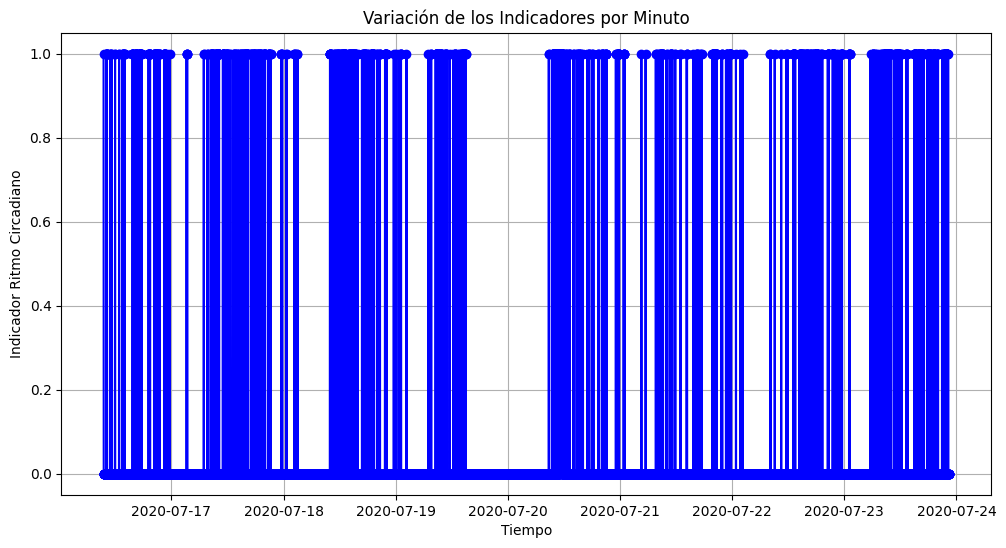

In [181]:
# Generar la gráfica de cómo varían los indicadores de los minutos
plt.figure(figsize=(12, 6))
plt.plot(combined_df_min.index, combined_df_min['indicator_ritmo_circadiano'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Indicador Ritmo Circadiano')
plt.title('Variación de los Indicadores por Minuto')
plt.grid(True)
plt.show()

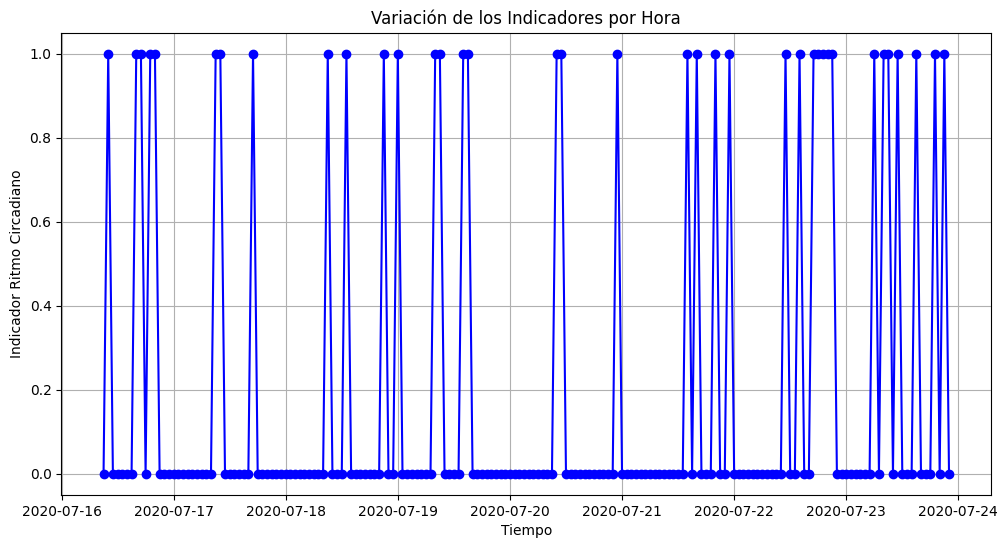

In [182]:
# Generar la gráfica de cómo varían los indicadores de los minutos
plt.figure(figsize=(12, 6))
plt.plot(combined_df_hour.index, combined_df_hour['indicator_ritmo_circadiano'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Indicador Ritmo Circadiano')
plt.title('Variación de los Indicadores por Hora')
plt.grid(True)
plt.show()

### Graficas de HR y Magnitud
Vamos a verificar donde suceden las pendientes de estos datos

#### Primero por Minutos

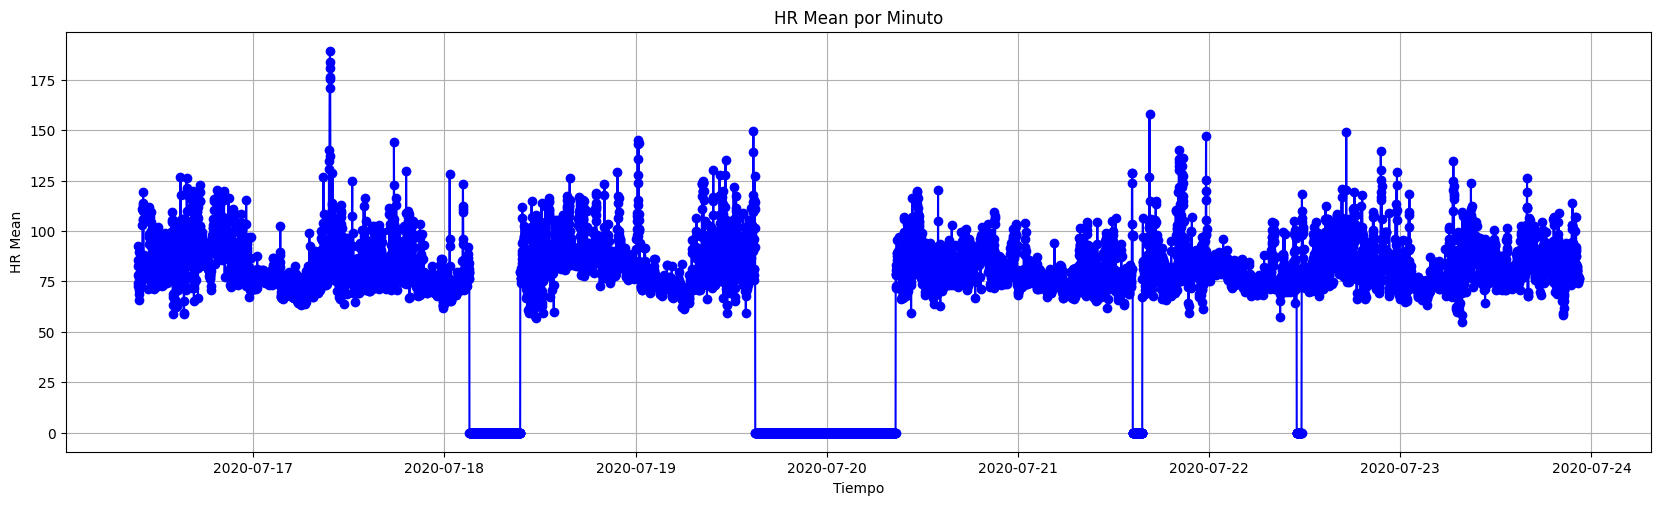

In [187]:
# Graficar hr_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['hr_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Mean')
plt.title('HR Mean por Minuto')
plt.grid(True)

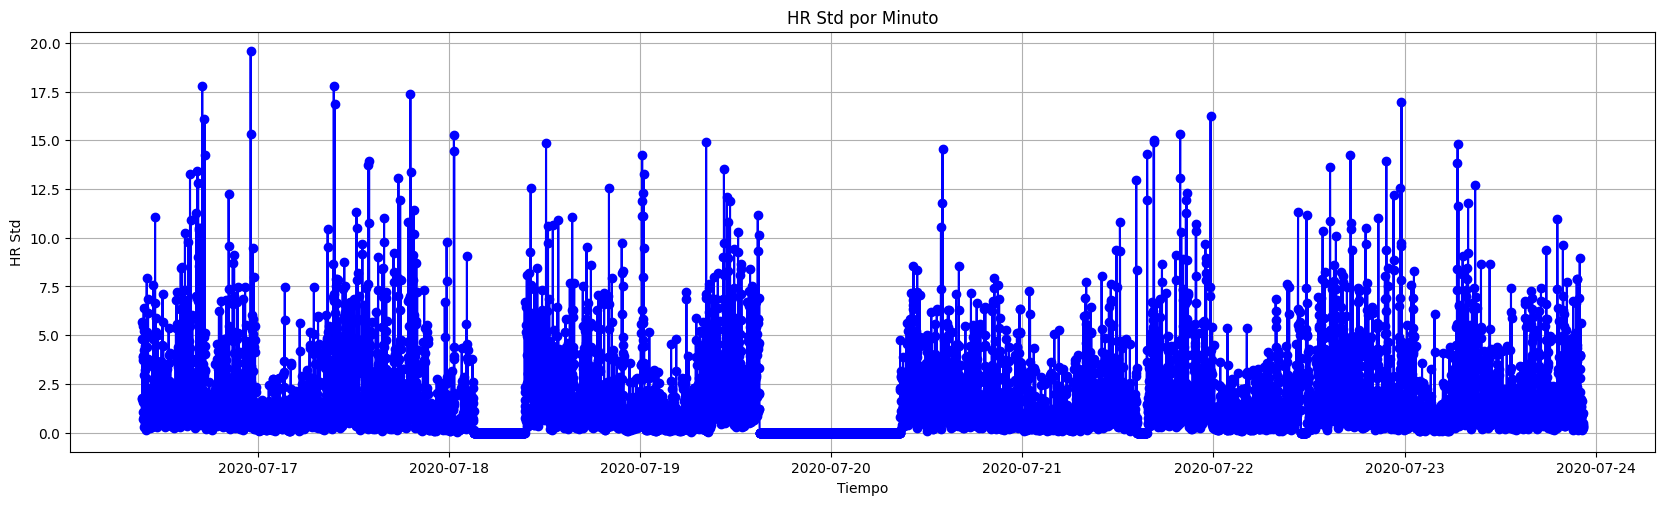

In [188]:
# Graficar hr_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['hr_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Std')
plt.title('HR Std por Minuto')
plt.grid(True)

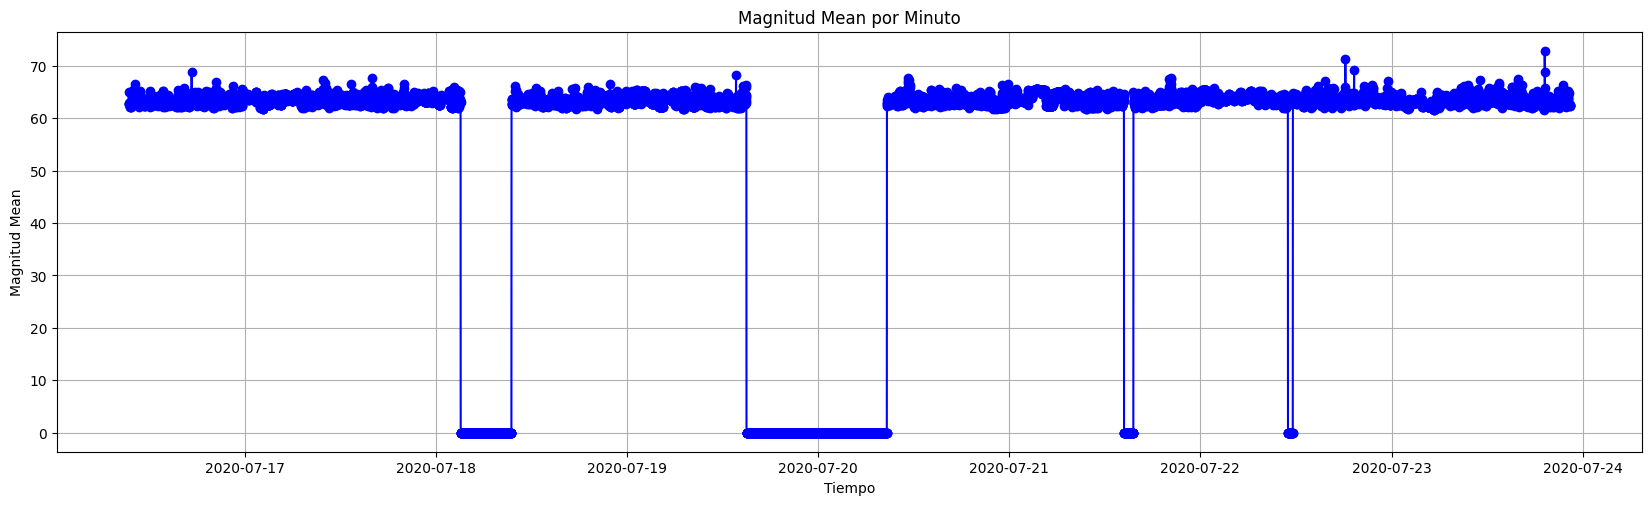

In [189]:
# Graficar magnitude_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['magnitude_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Mean')
plt.title('Magnitud Mean por Minuto')
plt.grid(True)

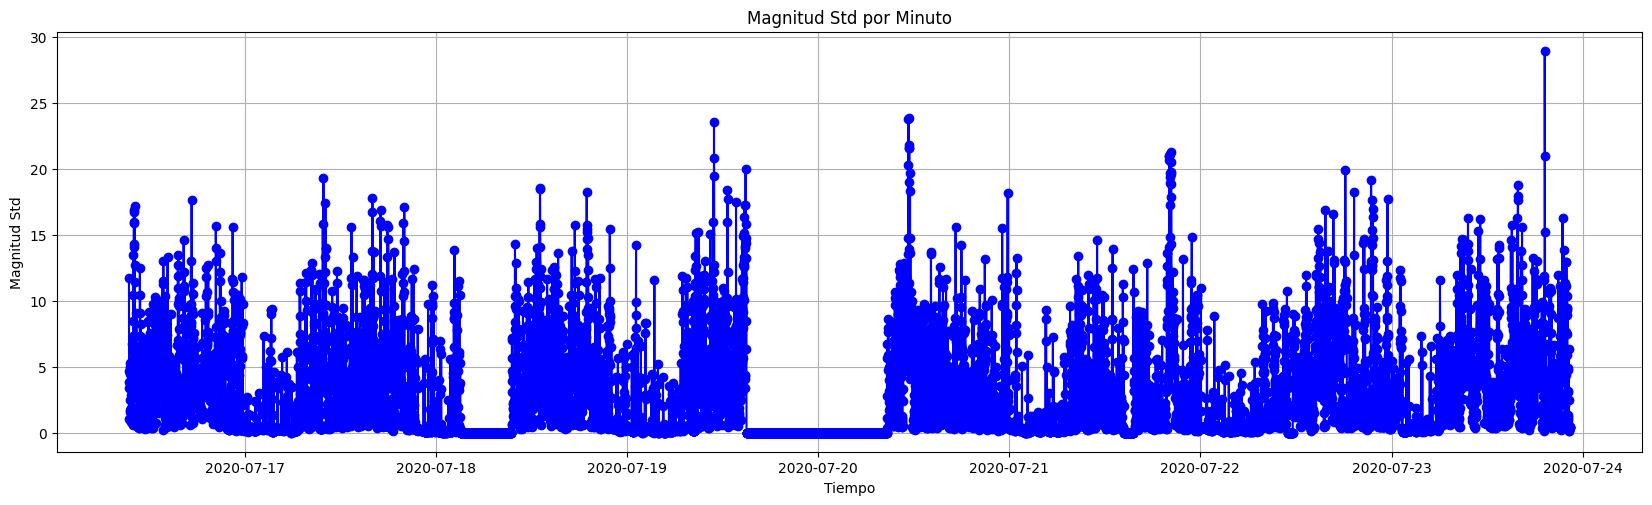

In [190]:
# Graficar magnitude_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_min.index, combined_df_min['magnitude_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Std')
plt.title('Magnitud Std por Minuto')
plt.grid(True)

#### Ahora por horas

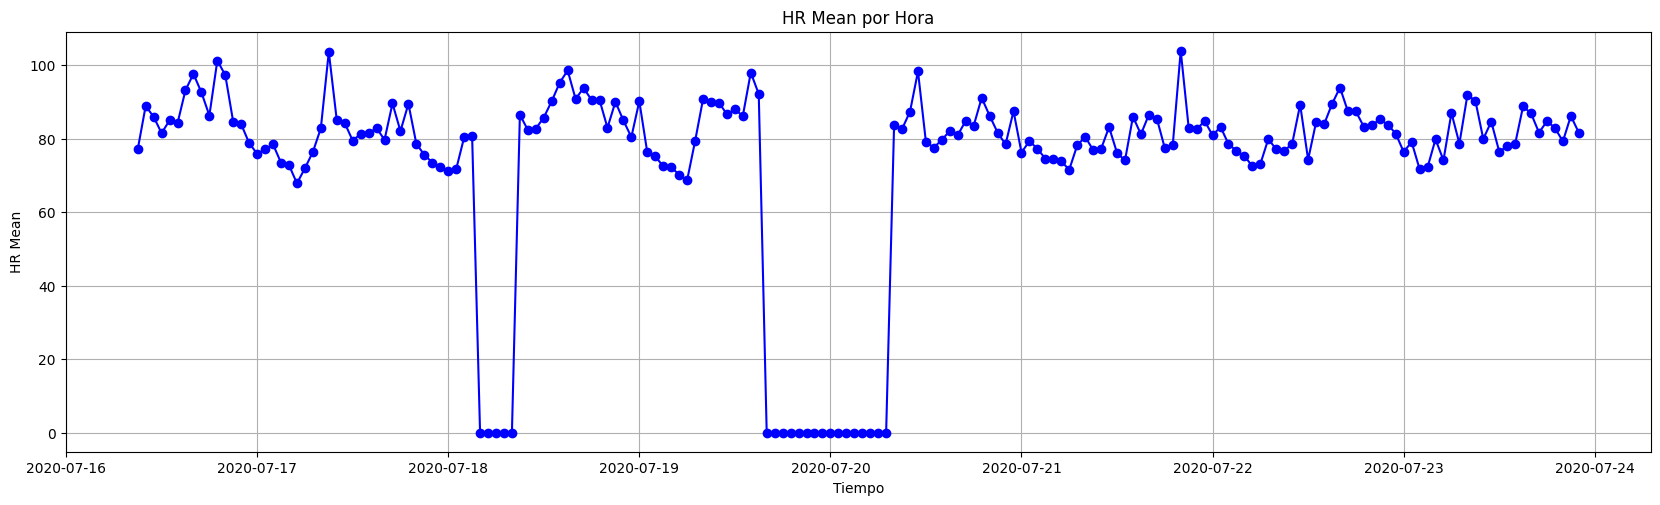

In [192]:
# Graficar hr_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['hr_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Mean')
plt.title('HR Mean por Hora')
plt.grid(True)

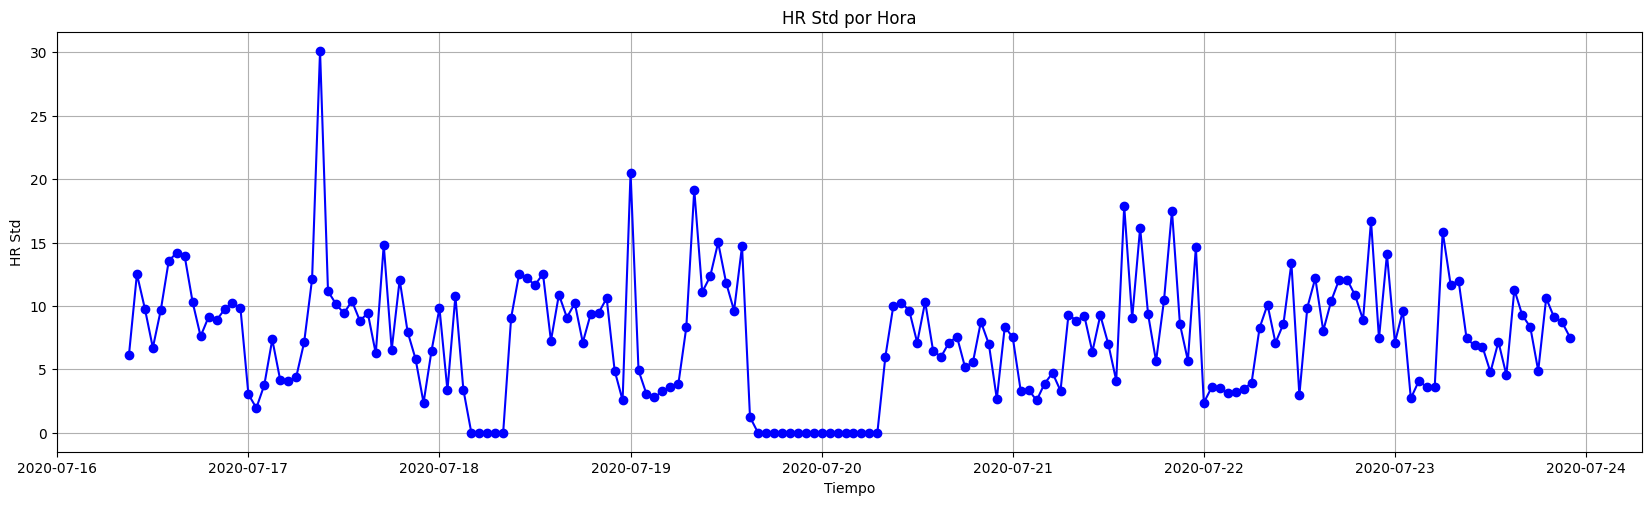

In [193]:
# Graficar hr_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['hr_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('HR Std')
plt.title('HR Std por Hora')
plt.grid(True)

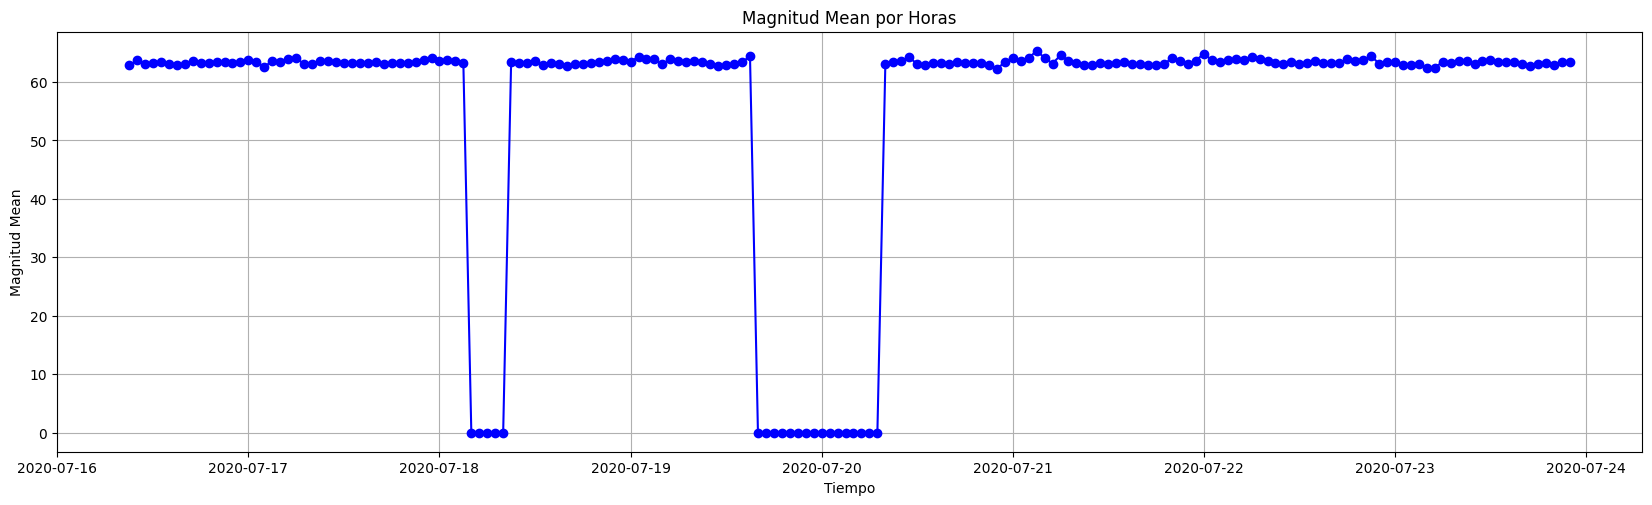

In [194]:
# Graficar magnitude_mean
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['magnitude_mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Mean')
plt.title('Magnitud Mean por Horas')
plt.grid(True)

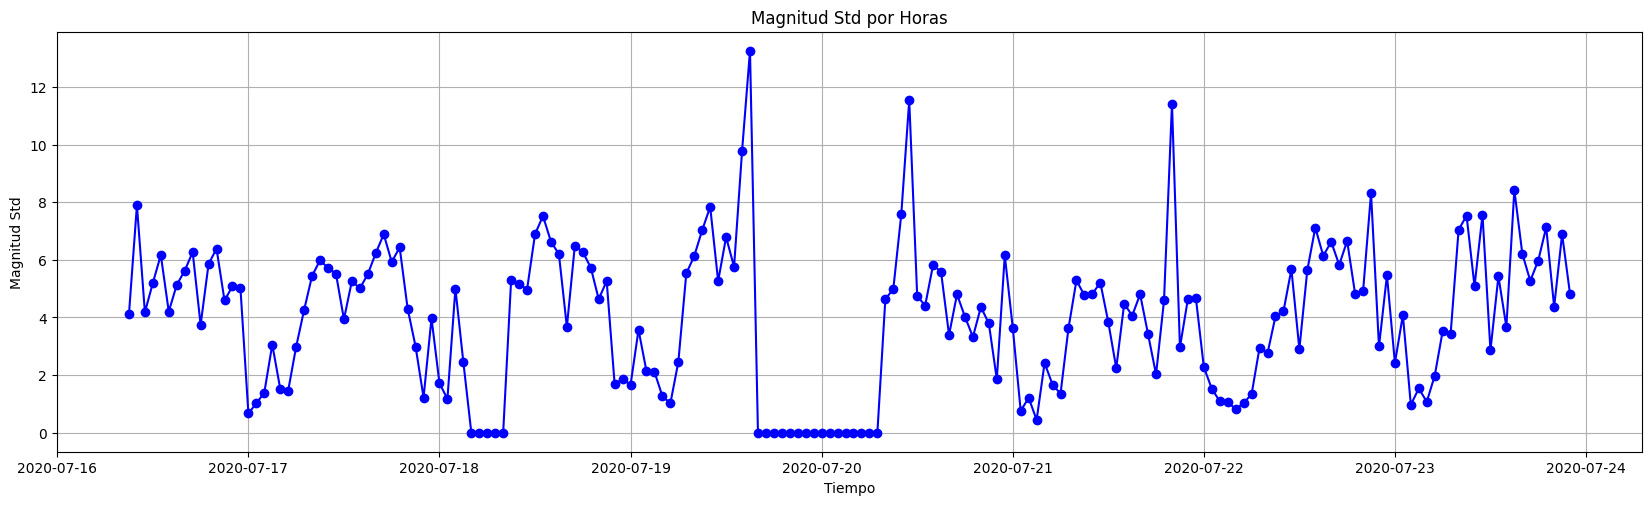

In [195]:
# Graficar magnitude_std
plt.figure(figsize=(45, 12))
plt.subplot(2, 2, 1)
plt.plot(combined_df_hour.index, combined_df_hour['magnitude_std'], marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud Std')
plt.title('Magnitud Std por Horas')
plt.grid(True)

* Podriamos decir que donde se tienen pendientes pronunciadas y estan llegan a mantenerse en valores distintos al por los siguientes 25 min ( en caso de las graficas por minutos) y 75 min (en caso de las graficas por hora), son la hora de despertar en ese momento del sujeto.

#### Guardamos los datos procesados en csv

In [183]:
combined_df_min.to_csv('ritmo_circadiano_min.csv', index=False)
combined_df_hour.to_csv('ritmo_circadiano_hour.csv', index=False)